In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
from dotenv import load_dotenv
import os
from multielo import MultiElo
from  matplotlib.ticker import FuncFormatter,  MaxNLocator

In [23]:
load_dotenv()

sheet_key = os.getenv('key')

df_url = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_key}/export?format=csv')

df_matches = pd.DataFrame(df_url).set_index('Name')
df_p_res = pd.read_csv('Match_Res.csv').set_index('Name')
df_p_res = pd.DataFrame(df_p_res)
#df_matches['Elo'] = df_matches['Elo'].fillna(df_p_res)


#m = df_p_res.merge(df_matches, on='Name', how='inner', suffixes=['', '_'], indicator=True)

df_matches.to_csv('Match_Res.csv')
#df_matches.to_csv('Match_data.csv')

df_matches = df_matches[df_matches['Elo'].isnull()]
df_matches.to_csv('Match_data.csv')

In [24]:
len(df_matches)



0

## Si vas a comenzar desde 0 pasa estas lineas a codigo




headerL = ['Name','Elo','Wins']
Leaderboard_n = [['Sebas',1200,np.nan],['Ricardo',1200,np.nan],['Jochy',1200,np.nan],['Jael',1200,np.nan],['Caleb',1200,np.nan]]
LB_dfp = pd.DataFrame(Leaderboard_n)
LB_dfp.columns = headerL
LB_dfp = LB_dfp.set_index('Name')
LB_dfp
LB_dfp.to_csv('Leaderboard.csv')

In [25]:
df = pd.read_csv('Match_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

loaded_LB_df = pd.read_csv('Leaderboard.csv')

#loaded_LB_df = loaded_LB_df.set_index('Name')


In [26]:
df1 = df[df.Date == df.Date.max()]

df_collec = {y: df1[df1['Match']==y] for y in df1['Match'].unique()}



In [27]:
len(df_collec)

0

In [28]:


if len(df_collec) == 0:
    loaded_LB_df = pd.read_csv('Leaderboard.csv')

    match_res = pd.read_csv('Match_Res.csv')

    print(loaded_LB_df)
    print(match_res)



else:

    match_res = []

    for i in range(1,len(df_collec)+1):

        loaded_LB_df = pd.read_csv('Leaderboard.csv')
        df_i = pd.DataFrame(df_collec[i].set_index('Name'))
        lb = loaded_LB_df.set_index('Name')['Elo']

    
        df_i['Elo'] = df_i['Elo'].fillna(lb)
        df_i = df_i.sort_values(by=['Result'])

        lb = pd.DataFrame(lb)
        c_elo = df_i.set_index('Result')['Elo']
        c_elo = np.array(c_elo)

        elo = MultiElo()

        n_elo = elo.get_new_ratings(c_elo)

        df_i['New_Elo'] = n_elo

        res_elo = df_i.drop(['Date','Result','Match'],axis=1)
    

        lb = pd.merge(lb, res_elo, on = ['Name', 'Elo'], how = 'outer')

        lb['Elo'] = lb['New_Elo'].fillna(lb['Elo'])
        lb['Wins'] = np.nan
        lb = lb.drop('New_Elo',axis=1)

        match_res.append(df_i)

        lb['Elo'] = lb['Elo'].astype(int)

        lb.to_csv('Leaderboard.csv')

    
     
    match_res = pd.concat(match_res)

    load_match_res = pd.read_csv('Match_Res.csv')

    lmr = load_match_res.set_index('Name')

    print(lmr)

    lmr['Date'] = pd.to_datetime(lmr['Date'])

    match_res_p = lmr.append(match_res)

    match_res_p.to_csv('Match_Res.csv')

    
    print(match_res_p)


      Name   Elo  Wins
0    Sebas  1227   NaN
1  Ricardo  1206   NaN
2    Jochy  1192   NaN
3     Jael  1170   NaN
4    Caleb  1201   NaN
       Name        Date  Result  Match   Elo      New_Elo
0     Sebas  2024-07-23       1      1  1200  1224.000000
1   Ricardo  2024-07-23       2      1  1200  1208.000000
2     Jochy  2024-07-23       3      1  1200  1192.000000
3      Jael  2024-07-23       4      1  1200  1176.000000
4   Ricardo  2024-07-23       1      2  1208  1231.449228
5     Sebas  2024-07-23       2      2  1224  1229.981841
6      Jael  2024-07-23       3      2  1176  1170.384756
7     Caleb  2024-07-23       4      2  1200  1176.184174
8     Caleb  2024-08-26       1      1  1176  1200.622586
9   Ricardo  2024-08-26       2      1  1231  1229.264001
10    Sebas  2024-08-26       3      1  1229  1206.113413
11    Sebas  2024-08-26       1      2  1206  1227.854241
12    Caleb  2024-08-26       2      2  1200  1201.072459
13  Ricardo  2024-08-26       3      2  1229  1206

In [29]:
Leaderboard = pd.read_csv('Leaderboard.csv')
Matches = pd.read_csv('Match_Res.csv')


Leaderboard = Leaderboard.set_index('Name')

Leaderboard = Leaderboard.sort_values(by=['Elo'],ascending=False)


m = Matches.drop('Date', axis=1)
#m = m[m.Result < 2]

m = m[m['Result'] == 1]['Name'].value_counts()

Leaderboard['Wins'] = m
Leaderboard['Wins'] = Leaderboard['Wins'].fillna(0)

Leaderboard
#print(m)

,Elo,Wins
Name,,
Sebas,1227,2.0
Ricardo,1206,1.0
Caleb,1201,1.0
Jochy,1192,0.0
Jael,1170,0.0


In [30]:
#match_c = Matches.drop('Date', axis=1)

#match_c = match_c[match_c['Result'] >= 1]['Name'].value_counts()

#match_c

Matches['count'] = Matches.groupby('Name').cumcount() + 1
Matches

#sns.scatterplot(data=Matches, x='Match', y='Elo', hue='Name')

,Name,Date,Result,Match,Elo,New_Elo,count
0,Sebas,2024-07-23,1,1,1200,1224.000000,1
1,Ricardo,2024-07-23,2,1,1200,1208.000000,1
2,Jochy,2024-07-23,3,1,1200,1192.000000,1
3,Jael,2024-07-23,4,1,1200,1176.000000,1
4,Ricardo,2024-07-23,1,2,1208,1231.449228,2
5,Sebas,2024-07-23,2,2,1224,1229.981841,2
6,Jael,2024-07-23,3,2,1176,1170.384756,2
7,Caleb,2024-07-23,4,2,1200,1176.184174,1
8,Caleb,2024-08-26,1,1,1176,1200.622586,2
9,Ricardo,2024-08-26,2,1,1231,1229.264001,3


Text(0.5, 0, 'Games Played')

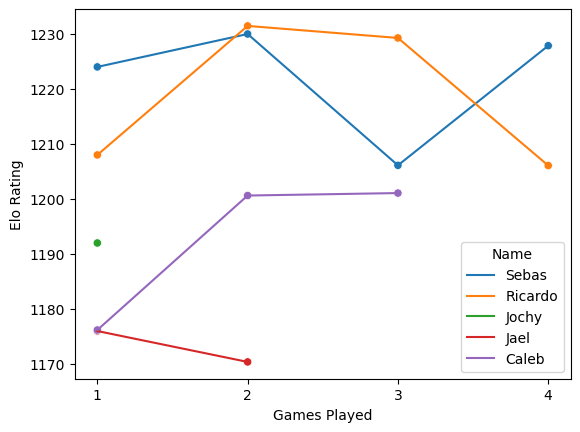

In [31]:
sns.lineplot(data=Matches,x='count',y='New_Elo',hue='Name')

sns.scatterplot(data=Matches,x='count',y='New_Elo',hue='Name',legend=False)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.ylabel('Elo Rating')
plt.xlabel('Games Played')

#plt.plot(Matches['Date'],Matches['New Elo'])